In [21]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rioxr
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

import pystac_client
import planetary_computer

from shapely import Polygon
from shapely import box

In [2]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [3]:
x = [
[-99.11659789905933, 19.28243648833032],
[-99.11659789905933, 19.241327757557883],
[-99.06921169946003, 19.241327757557883],
[-99.06921169946003, 19.28243648833032],
[-99.11659789905933, 19.28243648833032]
]

In [4]:
Polygon(x).bounds

(-99.11659789905933, 19.241327757557883, -99.06921169946003, 19.28243648833032)

In [5]:
box_bounds = [-99.11659789905933, 19.241327757557883, -99.06921169946003, 19.28243648833032]

In [6]:
search = catalog.search(collections=["io-lulc-9-class"], 
                        bbox=box_bounds)

In [7]:
items = search.item_collection()
len(items)

6

In [8]:
for item in items:
    print(item.properties['end_datetime'])

2023-01-01T00:00:00Z
2022-01-01T00:00:00Z
2021-01-01T00:00:00Z
2020-01-01T00:00:00Z
2019-01-01T00:00:00Z
2018-01-01T00:00:00Z


In [9]:
item23 = items[0]
item23.properties['end_datetime']

'2023-01-01T00:00:00Z'

In [10]:
item23.assets['data'].href
data = rioxr.open_rasterio(item.assets['data'].href).squeeze()
data

<xarray.DataArray (y: 88853, x: 64219)>
[5706050807 values with dtype=uint8]
Coordinates:
    band         int64 1
  * x            (x) float64 1.789e+05 1.789e+05 ... 8.211e+05 8.211e+05
  * y            (y) float64 2.657e+06 2.657e+06 ... 1.769e+06 1.769e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0

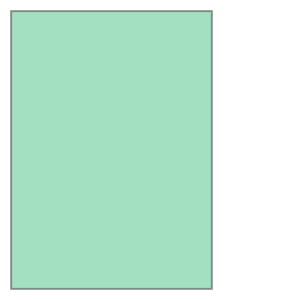

In [19]:
box(*data.rio.bounds())

In [15]:
data.rio.crs

CRS.from_epsg(32614)

In [19]:
aoi = gpd.GeoDataFrame(geometry=[box(*box_bounds)], crs='epsg:4326').to_crs(data.rio.crs)
aoi

,geometry
0,"POLYGON ((492726.040 2127531.633, 492727.853 2..."


In [24]:
raster_bbox = gpd.GeoDataFrame(geometry=[box(*data.rio.bounds())], crs=data.rio.crs)

<Axes: >

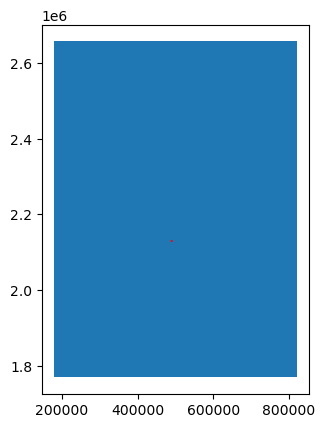

In [25]:
fig, ax = plt.subplots()
raster_bbox.plot(ax=ax)
aoi.plot(ax=ax, color='red')

In [29]:
xochimilco = data.rio.clip_box(*aoi.total_bounds)
xochimilco

<xarray.DataArray (y: 456, x: 500)>
[228000 values with dtype=uint8]
Coordinates:
    band         int64 1
  * x            (x) float64 4.877e+05 4.878e+05 ... 4.927e+05 4.927e+05
  * y            (y) float64 2.132e+06 2.132e+06 ... 2.128e+06 2.128e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     0

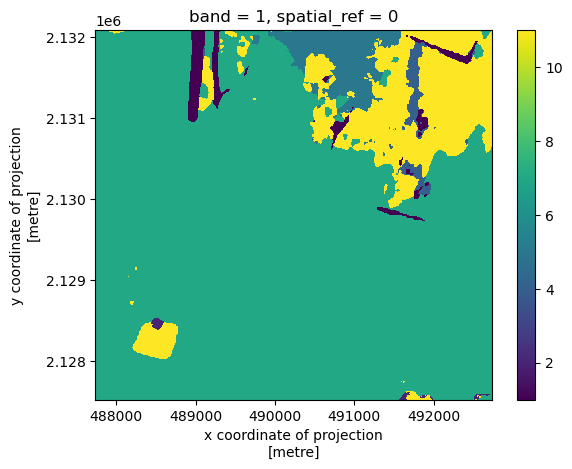

In [30]:
xochimilco.plot()